# Simple MNIST neural network example

Simple neural network example using MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
learning_rate = 0.001
batch_size = 1000
n_epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Display some examples of the training data.

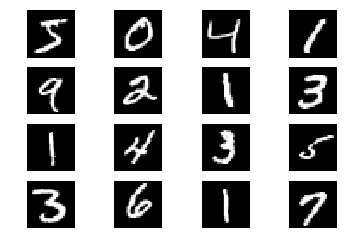

In [4]:
fig, subplots = plt.subplots(4, 4)

for i in range(16):
    x_index = i % 4
    y_index = i // 4

    ax = subplots[y_index, x_index]
    ax.axis('off')
    ax.imshow(x_train[i], cmap='gray')

In [5]:
x_batch = tf.placeholder(tf.float32, shape=(None, 784))
y_batch = tf.placeholder(tf.float32, shape=(None, 10))

Reshape and reformat data.

In [6]:
x_train_input = x_train.reshape([-1, 784]).astype(np.float32)
y_train_one_hot = tf.one_hot(indices=y_train, depth=10)

In [7]:
hidden_layer = tf.contrib.layers.fully_connected(
    inputs=x_batch,
    num_outputs=25,
    activation_fn=None,
    trainable=True)

output_layer = tf.contrib.layers.fully_connected(
    inputs=hidden_layer,
    num_outputs=10,
    activation_fn=None,
    trainable=True)

train_loss = tf.losses.sigmoid_cross_entropy(y_batch, output_layer)

adam_opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_opt = adam_opt.minimize(loss=train_loss)

In [8]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

n_batches = x_train.shape[0] // batch_size

for epoch in range(n_epochs):
    print('epoch:', epoch)
    total_loss = 0.0
    for batch in range(n_batches):
        # Get batch of data
        start_index = batch_size * batch
        end_index = start_index + batch_size
        x_train_batch = x_train[start_index: end_index].reshape((-1, 784)).astype(np.float32)
        y_train_batch = tf.one_hot(indices=y_train[start_index: end_index], depth=10)
        y_train_batch = y_train_batch.eval(session=sess)
        
        _, loss = sess.run(
            (train_opt, train_loss),
            feed_dict={x_batch: x_train_batch, y_batch: y_train_batch})
        total_loss = total_loss + loss
    print('total_loss:', total_loss)

epoch: 0
total_loss: 434.29746305942535
epoch: 1
total_loss: 103.99333447217941
epoch: 2
total_loss: 73.09056621789932
epoch: 3
total_loss: 58.207933127880096
epoch: 4
total_loss: 48.63280323147774
epoch: 5
total_loss: 41.443784683942795
epoch: 6
total_loss: 36.49259266257286
epoch: 7
total_loss: 32.82809638977051
epoch: 8
total_loss: 29.313136249780655
epoch: 9
total_loss: 25.705429077148438
epoch: 10
total_loss: 23.19368840754032
epoch: 11
total_loss: 21.003036215901375
epoch: 12
total_loss: 19.783747673034668
epoch: 13
total_loss: 18.376859575510025
epoch: 14
total_loss: 17.636203214526176
epoch: 15
total_loss: 16.03913214802742
epoch: 16
total_loss: 15.494131922721863
epoch: 17
total_loss: 13.948309808969498
epoch: 18
total_loss: 13.766295783221722
epoch: 19
total_loss: 13.3656642511487


Display some examples of the test data.

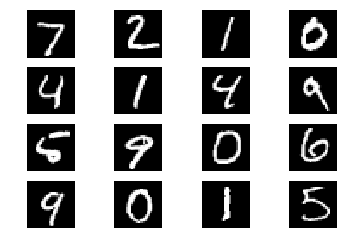

In [9]:
fig, subplots = plt.subplots(4, 4)

for i in range(16):
    x_index = i % 4
    y_index = i // 4

    ax = subplots[y_index, x_index]
    ax.axis('off')
    ax.imshow(x_test[i], cmap='gray')

Use the network to make predictions for the test examples above.

In [10]:
x_test_batch = x_test[0:16].reshape((-1, 784)).astype(np.float32)
y_test_batch = tf.one_hot(indices=y_test[0:16], depth=10)
y_test_batch = y_test_batch.eval(session=sess)


predict = tf.argmax(tf.nn.sigmoid(output_layer), axis=1)
        
predicted = sess.run(predict, feed_dict={x_batch: x_test_batch, y_batch: y_test_batch})
print(predicted)

[7 2 1 0 4 1 4 9 4 9 0 6 9 0 1 5]


Not too bad, but definitely room for improvement!